In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns 
import statsmodels.formula.api as sm

# Repaso Modelos Lineales

En este repaso, veremos dos casos sencillos que nos ayudarán a refrescar nuestros conocimientos de modelado en Python. 

Las funciones lineales son la base de muchos algoritmos de aprendizaje. La regresión lineal es el problema de ajustar una función lineal a un conjunto de pares de entrada-salida dado un conjunto de ejemplos de entrenamiento, en el que las características de entrada y salida son numéricas.

Ecuación general de la recta: y = ax + b

Empezamos el Repaso con la famosa [Ley de Moore](https://es.wikipedia.org/wiki/Ley_de_Moore). Comprobaremos que en efecto, una regresión lineal (con transformación logarítmica) nos permite calcular el famoso número que nos dice que aproximadamente cada 2 años se duplica el número de transistores en un microprocesador.

In [2]:
# Cargamos datos
url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"
# Load in the data
data = pd.read_csv(url, header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


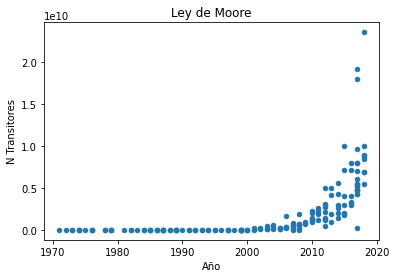

In [5]:
# Exploracion gráfica simple 
ax = data.plot(
    kind='scatter', 
    x=0, y=1, 
    title='Ley de Moore')
ax.set_xlabel('Año')
ax.set_ylabel('N Transitores');

Los datos evidentemente no tiene una relación lineal de principio. Por ello, aplicaremos una transformación logarítmica que nos ayude a encontrar la relación lineal que buscamos.

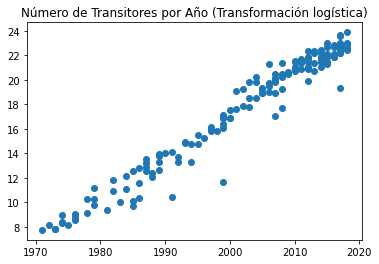

In [7]:
# tratamos los datos como matrices 
X = data.loc[:,0]  # todas las filas de la columna 0 (Año)
Y = data.loc[:,1]  # todas las filas de la columna 1 (memoria)

# Queremos realizar una regresión lineal por lo que la relación debe ser lineal
# para ello sacamos el logaritmo de Y 
Y = np.log(Y)
plt.scatter(X, Y)
plt.title("Número de Transitores por Año (Transformación logística)")
plt.show()
# la grafica lo muestra mejor. 


In [8]:
# Podemos centrar los datos a la media, esto nos ayudará a quitar extremos
# usualmente se lo podría normalizar (scale it), pero luego lo tendríamos que 
# transformar nuevamente. Para este caso tan simple, con esto nos basta. 
X = X - X.mean()
X = X.values.reshape(-1, 1) # el modelo necesita matrices de 2D, en vez de 1. 

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)
# sacamos la pendiente (slope)
a = lm.coef_[0]
# print intercept and coefficients
print(f'Intercept : {lm.intercept_}')
print(f'Pendiente (coef) {a}')


Intercept : 17.764939393631764
Pendiente (coef) 0.3416824873873131


Nuestro modelo original de crecimiento exponencial es

C=A0rt 

Donde C es el número de transistores y t es el año.

r es la tasa de crecimiento. Por ejemplo, cuando t pasa de 1 a 2, C aumenta en un factor de r . Cuando t pasa de 2 a 3, C vuelve a aumentar en un factor de r.

Si tomamos el logaritmo de ambos lados, obtenemos

logC=logr∗t+logA0 

Esta es nuestra ecuación lineal:

y^=ax+b 

Donde:

y^=logC 
a=logr 
x=t 
b=logA0 

Nos interesa r , porque es la tasa de crecimiento. Dados nuestros pesos de regresión, sabemos que:

a=0.34188038 

por lo que:

r=e0.34188038 = 1.4076 

Para encontrar el tiempo que tarda en duplicarse el número de transistores, simplemente tenemos que encontrar el tiempo que tarda C en aumentar hasta 2C .

Llamemos al tiempo inicial t , para que se corresponda con el recuento inicial de transistores C .

Llamemos al tiempo final t′ , para que se corresponda con el recuento final de transistores 2C .

Entonces también tenemos

2C=A0rt′ 

Combinemos esto con nuestra ecuación original

C=A0rt 

Obtenemos (dividiendo las 2 ecuaciones)

2C/C=(A0rt′)/A0rt 

Lo que se simplifica en:

2=r(t′-t) 

Resolver para t′-t :

t′-t=log2logr=log2a 

¡Nota importante! No hemos especificado cuál es realmente el tiempo inicial t, y no tenemos que hacerlo ya que acabamos de demostrar que esto se cumple para cualquier t .


In [10]:
print("Tiempo en duplicar capacidad:", round(np.log(2) / a, 2))

Tiempo en duplicar capacidad: 2.03


Ahí está! La respuesta que estabamos buscando! El tiempo en duplicar los transitores en un microprocesador es 2.03 años. 

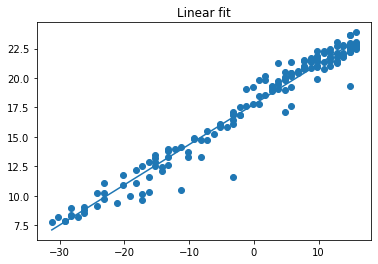

In [10]:
# Make sure the line fits our data
Yhat = lm.predict(X).flatten()
fig = plt.figure()
plt.title('Linear fit')
plt.scatter(X, Y)
plt.plot(X, Yhat);

# Segundo caso de uso (Marketing Mix Models) 

Vamos a aplicar un modelo muy sencillo marketing mix. Que busca extraer la contribución de cada uno de los canales de comunicación que utilizamos para promocionar un producto. En este caso, una regresión lineal nos permite extraer los betas de cada canal, que se podrá utilizar para interpretar el impacto que ha tenido cada esfuerzo de marketing. 

En este sencillo ejemplo, tenemos la inversión en TV, Radio, Periódicos y las ventas asociadas bajo un eje temporal. 




In [12]:
# read data into a DataFrame
url = 'https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/master/www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
data = pd.read_csv(url, index_col=0)
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


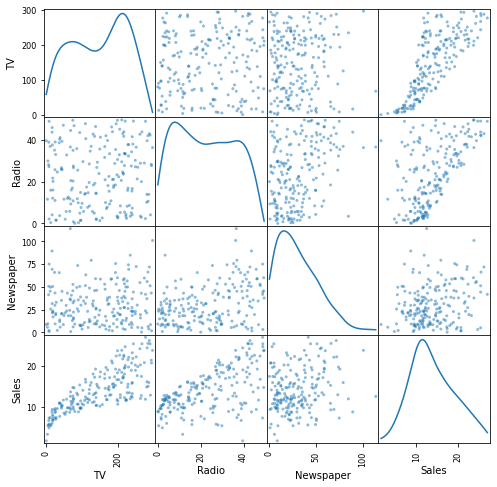

In [13]:
# Exploración básica
scatter_matrix(data,figsize=(8, 8), diagonal='kde')
plt.show()

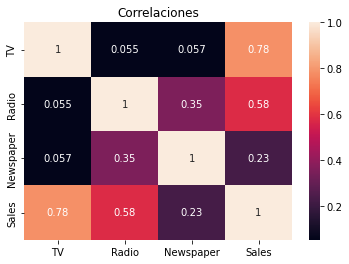

In [14]:
sns.heatmap(data.corr(), annot=True)
plt.title('Correlaciones')
plt.show()

In [15]:
# En SkLearn podemos hacer un modelo sencillo 
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coeficientes: {lm.coef_}")

Intercept: 2.9388893694594085
Coeficientes: [ 0.04576465  0.18853002 -0.00103749]


In [16]:
# Evaluamos nuestro Modelo con R Cuadrado
# https://economipedia.com/definiciones/r-cuadrado-coeficiente-determinacion.html
lm.score(X, y)

0.8972106381789521

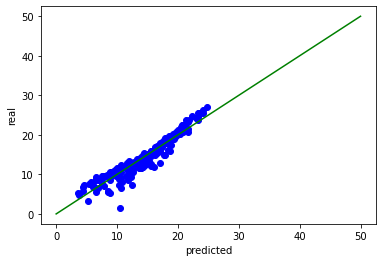

In [17]:
# Ploteamos la relación entre nuestra predicción y los datos reales
p = lm.predict(X)
plt.plot(p, y,'bo')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()


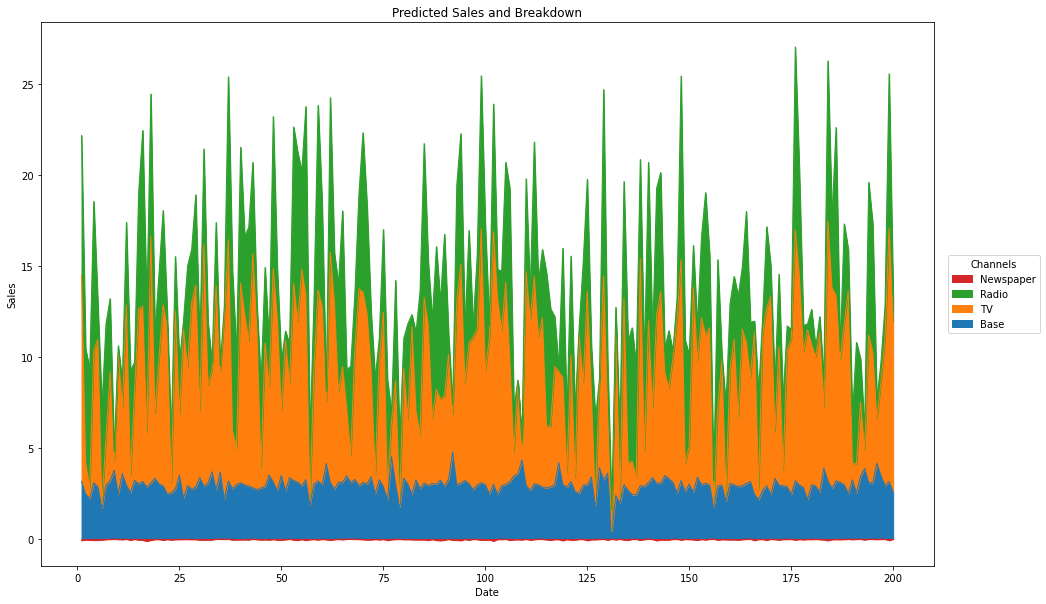

In [25]:
weights = pd.Series(
    lm.coef_,
    index=X.columns
)
base = lm.intercept_  # la base es el intercept. 
# Es decir las ventas que no podemos predecir usando los canales de MKT
unadj_contributions = X.mul(weights).assign(Base=base)
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # Contribuciones por dia. 
    
ax = (adj_contributions[['Base'] + feature_cols]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date')
     )
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)
plt.show()

Tenemos las contribuciones por canal. Podemos ver claramente que TV tiene la mayor contribución y que los periódicos tienen un impacto mínimo en nuestras ventas. Con esta información además podemos calcular el Retorno de la inversión del canal (Ventas asociadas a cada canal / inversión en canal).

¿Puedes calcular el ROI por cada canal?
¿Cuál es el más efectivo?